<a href="https://colab.research.google.com/github/AlImran1027/CSE299_Project/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [312]:
df = pd.read_csv("cleaned_merged_heart_dataset.csv")
#df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [313]:
df.fillna(df.mean(), inplace=True)  # Fills missing values with column mean


In [314]:
df = df.drop(columns=['thal']) #if we run this model by the 'Cardiovascular_Disease_Dataset.csv' dataset than this line will be comment out

In [315]:
X = df.iloc[: , :-1].values #if we run this model by the 'Cardiovascular_Disease_Dataset.csv' dataset than the X will be (df.iloc[:, 1:-1])
Y = df.iloc[: , -1].values

In [316]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
target      0
dtype: int64


In [317]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [318]:
# Check for NaN values
print("NaN values in X_train:\n", np.isnan(X_train).sum())
print("NaN values in X_test:\n", np.isnan(X_test).sum())

# Check for infinite values
print("Infinite values in X_train:", np.isinf(X_train).sum())
print("Infinite values in X_test:", np.isinf(X_test).sum())


NaN values in X_train:
 0
NaN values in X_test:
 0
Infinite values in X_train: 0
Infinite values in X_test: 0


In [319]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [320]:
# Create and train the decision tree classifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [321]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

In [322]:
# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9453
Precision: 0.9614
Recall: 0.9320
F1 Score: 0.9465
AUC-ROC Score: 0.9458

Confusion Matrix:
[[262  11]
 [ 20 274]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.96      0.93      0.95       294

    accuracy                           0.95       567
   macro avg       0.95      0.95      0.95       567
weighted avg       0.95      0.95      0.95       567



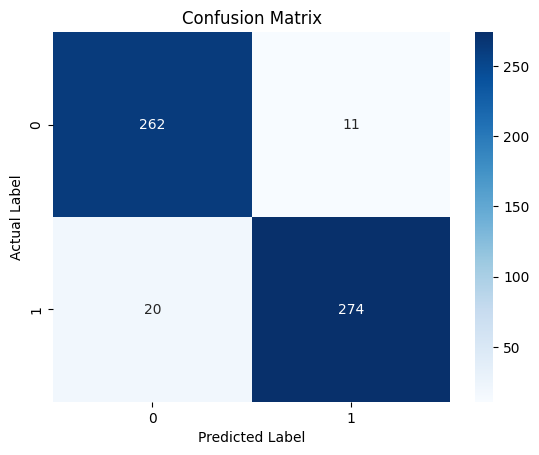

In [323]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


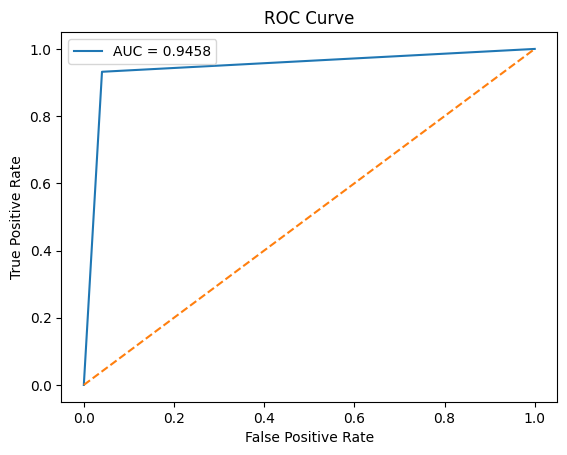

In [324]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Random model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


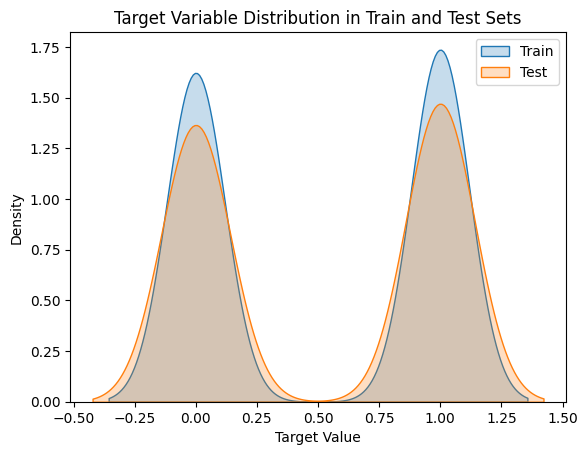

In [325]:
# KDE plot for target variable
sns.kdeplot(y_train, label="Train", fill=True)
sns.kdeplot(y_test, label="Test", fill=True)
plt.legend()
plt.xlabel("Target Value")  # You might need to adjust this label
plt.ylabel("Density")
plt.title("Target Variable Distribution in Train and Test Sets")
plt.show()

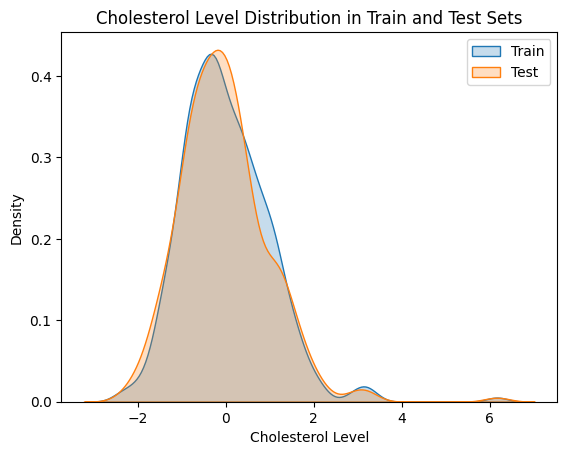

In [326]:
# Convert X_train and X_test back to DataFrame to extract 'chol'
# Get the columns from the original dataframe before converting to numpy array
X_train_df = pd.DataFrame(X_train, columns=df.columns[:-1]) # Exclude target column (if for 'Cardiovascular_Disease_Dataset.csv' dataset then this will be like [1: -1] )
X_test_df = pd.DataFrame(X_test, columns=df.columns[:-1]) # Exclude target column


# KDE plot for cholesterol levels
sns.kdeplot(X_train_df['chol'], label="Train", fill=True)#for the 'Cardiovascular_Disease_Dataset.csv' dataset the 'chol' will be replaced with 'serumcholestrol'
sns.kdeplot(X_test_df['chol'], label="Test", fill=True)
plt.legend()
plt.xlabel("Cholesterol Level")
plt.ylabel("Density")
plt.title("Cholesterol Level Distribution in Train and Test Sets")
plt.show()

In [327]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-Fold CV
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

Cross-Validation Accuracy: 0.9425 ± 0.0167


In [328]:
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


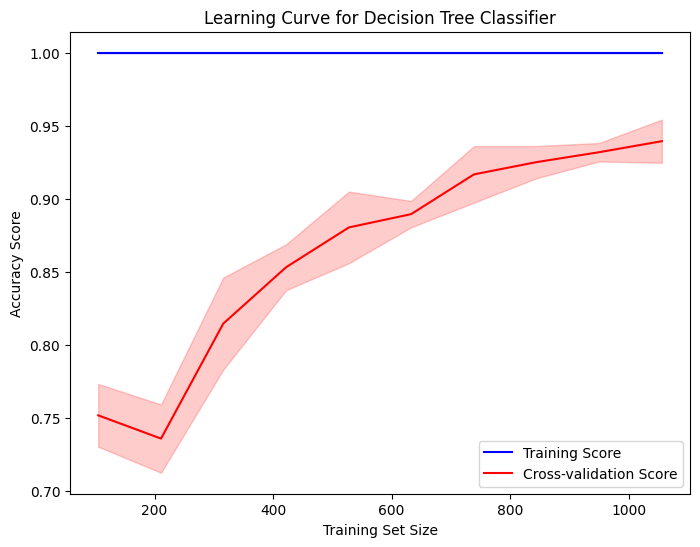

In [329]:
plt.figure(figsize=(8,6))

# Plot training curve
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

# Plot validation curve
plt.plot(train_sizes, test_mean, label="Cross-validation Score", color="red")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

# Labels and title
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for Decision Tree Classifier")
plt.legend()
plt.show()


In [330]:
# Analyze the learning curve
train_mean = np.mean(train_scores, axis=1)
# val_mean = np.mean(val_scores, axis=1)  # This line was causing the error
val_mean = np.mean(test_scores, axis=1)  # Use 'test_scores' instead which is already calculated

print("Training Scores:", train_mean)
print("Validation Scores:", val_mean)

# Check for underfitting/overfitting
if train_mean[-1] < 0.8 and val_mean[-1] < 0.8:
    print("Model is underfitting (high bias).")
elif train_mean[-1] > 0.9 and val_mean[-1] < 0.8:
    print("Model is overfitting (high variance).")
else:
    print("Model is performing well (good fit).")

Training Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Validation Scores: [0.75171527 0.7357976  0.81453116 0.85312464 0.88038593 0.88948256
 0.91670955 0.92506003 0.93186964 0.9394311 ]
Model is performing well (good fit).
